In [ ]:
#H05T02a
#lisää säädatan käsittelyä

In [1]:
#datan esikäsittely
import pandas as pd

url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv'
df = pd.read_csv(url, sep=',', decimal='.')

#splitataan aikasarake
aikasplit = df['Unnamed: 0'].str.split(' ')
df['paiva'] = aikasplit.str[0].str.split('-').str[2].astype(int)
df['tunti'] = aikasplit.str[1].str.split(':').str[0].astype(int)
df['minuutti'] = aikasplit.str[1].str.split(':').str[1].astype(int)
df['sekunti'] = aikasplit.str[1].str.split(':').str[2].astype(int)

#aikaleima sekunteina
df['aika_s'] = df['sekunti'] + df['minuutti']*60 + df['tunti']*3600 + df['paiva']*86400

#aikaa on kulunut mittaussarjan alusta
df['aika, s'] = df['aika_s'] - df.loc[0,'aika_s']

#tehdään uusi df
df2 = df[['aika, s','Air temperature, degC','Wind speed, m/s']].copy()

df2.head(5)

,"aika, s","Air temperature, degC","Wind speed, m/s"
0,0,6.5,2.3
1,600,6.2,2.5
2,1200,5.7,2.3
3,1800,5.7,2.8
4,2400,5.7,3.1


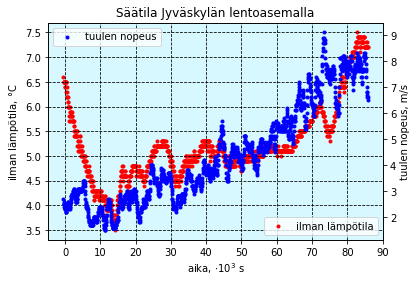

In [4]:
#hienoakin hienompi kuvaaja
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

#ensin punainen kuvaaja
t = df2['aika, s']/1000
plt.xticks(np.arange(0, len(t)+1, 10))
ax1.set_xlabel('aika, $\cdot10^3$ s')
ax1.scatter(t,df2['Air temperature, degC'], color='red', marker='.')
ax1.set_ylabel('ilman lämpötila, $\degree$C' )
ax1.legend(['ilman lämpötila'], loc='lower right')

#sitten sininen kuvaaja
ax2 = ax1.twinx()
ax2.scatter(t,df2['Wind speed, m/s'], color='blue', marker='.')
ax2.set_ylabel('tuulen nopeus, m/s' )
ax2.legend(['tuulen nopeus'], loc='upper left')

#lopuksi vielä halutut kuvaajan hienosäädöt
ax1.grid(color='black', linestyle='--', axis='both')
ax1.set_facecolor('#D7F8FF')
plt.title('Säätila Jyväskylän lentoasemalla')

plt.show()